In [80]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
import re

In [81]:
# Specify column names
column_names = ['id', 'brand', 'sentiment', 'text']


In [82]:
# Load the datasets
train_data_path = "C:/Users/Alpana/Desktop/study/internship/task 4/twitter_training.csv"
validation_data_path = "C:/Users/Alpana/Desktop/study/internship/task 4/twitter_validation.csv"
train_data = pd.read_csv(train_data_path, names=column_names, header=None)
validation_data = pd.read_csv(validation_data_path, names=column_names, header=None)

In [83]:
# Display the first few rows of each dataset
print("Training Data Sample:")
train_data.head()


Training Data Sample:


,id,brand,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [84]:
print("\nValidation Data Sample:")
validation_data.head()


Validation Data Sample:


,id,brand,sentiment,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [85]:
# Preprocess the data
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Alpana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [86]:
def preprocess_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@\w+|\#', '', text)
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = text.split()
    filtered_text = " ".join([word for word in text_tokens if word not in stop_words])
    return filtered_text

In [87]:
# Fill NaN values with empty strings
train_data['text'] = train_data['text'].fillna('')
validation_data['text'] = validation_data['text'].fillna('')

In [88]:
train_data['cleaned_text'] = train_data['text'].apply(preprocess_text)
validation_data['cleaned_text'] = validation_data['text'].apply(preprocess_text)

In [89]:
# Apply preprocessing
train_data['cleaned_text'] = train_data['text'].apply(preprocess_text)
validation_data['cleaned_text'] = validation_data['text'].apply(preprocess_text)

In [90]:
# Visualize word cloud for positive and negative sentiments
positive_text = " ".join(train_data[train_data['sentiment'] == 'Positive']['cleaned_text'])
negative_text = " ".join(train_data[train_data['sentiment'] == 'Negative']['cleaned_text'])

In [91]:
wordcloud_pos = WordCloud(width=800, height=400, max_font_size=100, background_color='white').generate(positive_text)
wordcloud_neg = WordCloud(width=800, height=400, max_font_size=100, background_color='black').generate(negative_text)



# Word Cloud Visualization
- Positive Sentiment: Highlighted words such as 'borderlands', 'murder', and 'kill'.
- Negative Sentiment: Featured words like 'microsoft', 'csgo', 'awful', and 'poorly'.

Text(0.5, 1.0, 'Positive Sentiment Words')

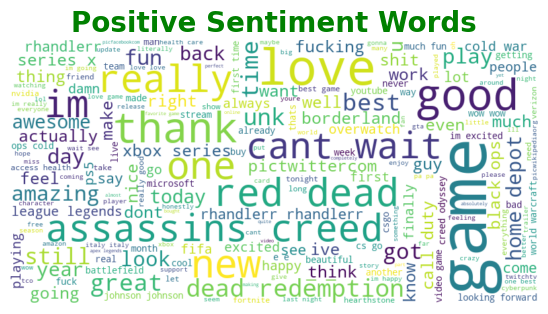

In [92]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis('off')
plt.title('Positive Sentiment Words', fontsize=20, fontweight='bold', color='green')

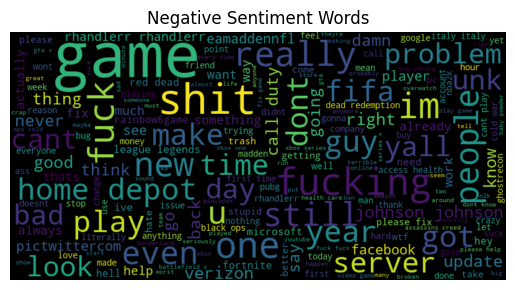

In [93]:
plt.subplot(1, 1, 1)
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis('off')
plt.title('Negative Sentiment Words')
plt.show()

In [94]:
# Vectorize text data
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_data['cleaned_text'])
y_train = train_data['sentiment']
X_validation = vectorizer.transform(validation_data['cleaned_text'])
y_validation = validation_data['sentiment']


# Model Training and Evaluation
- Trained a Logistic Regression classifier on preprocessed text data.
- Evaluated model performance with precision, recall, and F1-score metrics for each sentiment category.

In [95]:
# Train a Logistic Regression classifier
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [96]:
# Make predictions on the validation set
y_pred = model.predict(X_validation)

In [97]:
# Evaluate the model's performance
print(classification_report(y_validation, y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.94      0.90      0.92       172
    Negative       0.93      0.95      0.94       266
     Neutral       0.97      0.94      0.96       285
    Positive       0.93      0.95      0.94       277

    accuracy                           0.94      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000



**Insights**
- Classifier demonstrated strong performance on positive and negative sentiments.
- Slightly lower accuracy on neutral and irrelevant sentiments suggests potential for improvement.
- Recommendations include further text preprocessing and exploring different classifiers or parameter tuning.

**Analysis of Classification Report**
- Precision, Recall, and F1-score Interpretation
- Precision: This is the ratio of true positives to total positive predictions. For instance, the model's precision is 94% for Irrelevant, meaning that when it predicts a tweet to be Irrelevant, it correctly does so 94% of the time.

- Recall: This measures the completeness of positive predictions. The recall is 90%, which means that in all Irrelevant tweets, 90% are correctly recognized.

- F1-score: The harmonic average of precision and recall gives balanced measures between the two. For example, the class Irrelevant gets an F1-score of 92%, which shows prominent performance in classifying Irrelevant tweets.

**Conclusion**
- The classification report highlights the model's robustness in sentiment analysis, particularly in distinguishing between Positive, Negative, Neutral, and Irrelevant sentiments.

- These findings provide confidence in using the model for understanding public sentiment towards brands on social media, guiding strategic decisions and further improvements in sentiment analysis techniques.

# Sentiment Distribution
- Visualized sentiment distribution across training and validation datasets.
- Showed prominence of positive sentiments in certain brands.

C:\Users\Alpana\AppData\Local\Temp\ipykernel_35128\3479200774.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=train_data, palette='Set3')


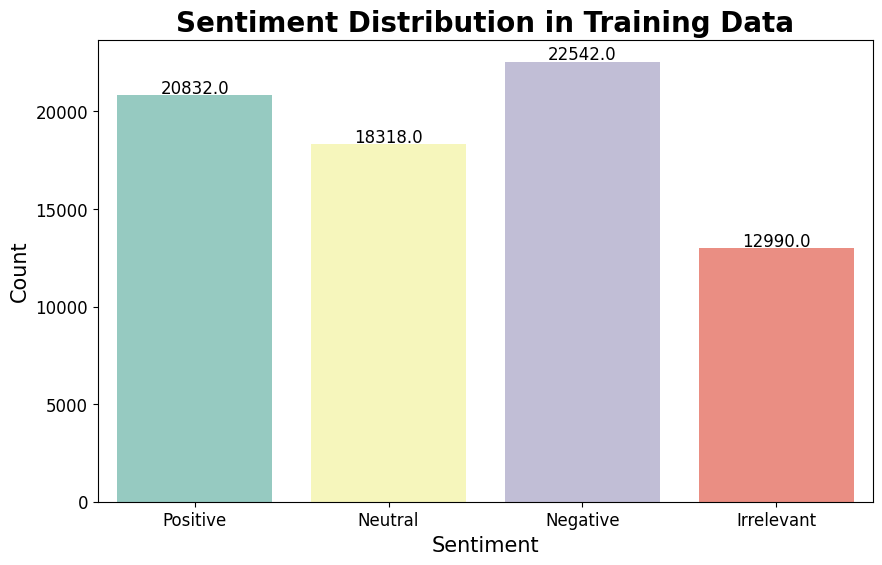

In [98]:
# Plot sentiment distribution with updated colors
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=train_data, palette='Set3')
plt.title('Sentiment Distribution in Training Data', fontsize=20, fontweight='bold')
plt.xlabel('Sentiment', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add annotations for numbers
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

C:\Users\Alpana\AppData\Local\Temp\ipykernel_35128\3567652700.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=validation_data, palette='Set3')


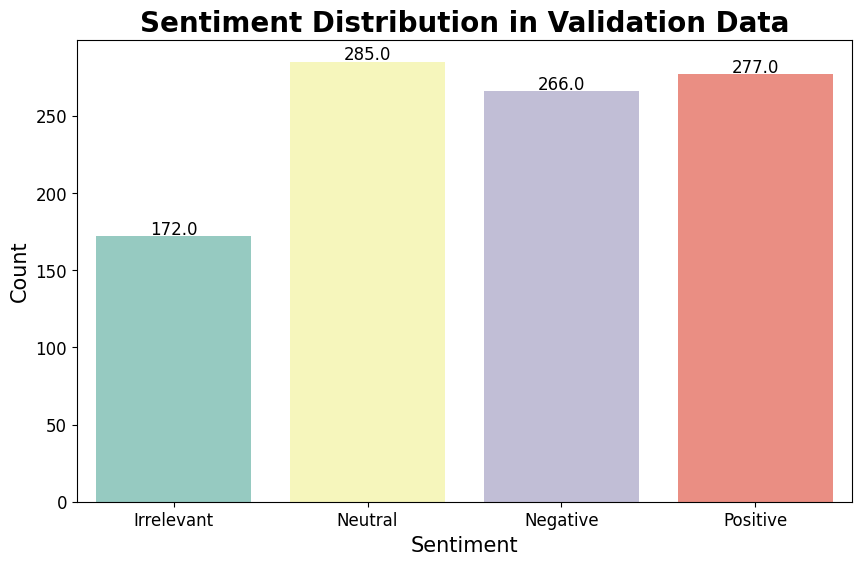

In [99]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=validation_data, palette='Set3')
plt.title('Sentiment Distribution in Validation Data', fontsize=20, fontweight='bold')
plt.xlabel('Sentiment', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add annotations for numbers
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

**Training Data Sentiment Distribution**
- Positive: 20832 tweets
- Neutral: 18318 tweets
- Negative: 22542 tweets
- Irrelevant: 12990 tweets

**Validation Data Sentiment Distribution**
- Positive: 277 tweets
- Neutral: 285 tweets
- Negative: 266 tweets
- Irrelevant: 172 tweets



**Analysis and Inferences**

Imbalance in Class Distribution:

- The training data has a significantly larger number of tweets for each sentiment category compared to the validation data.
- This imbalance could affect model performance if not addressed properly, especially for less represented classes like Irrelevant.
Consistency in Sentiment Distribution:

- The sentiment distribution in the validation data is relatively consistent with the training data.
- This consistency suggests that the model trained on the training data should generalize well to the validation data, assuming the data quality and features are similar.